## Лабораторная работа №3

#### Хахин Максим М8О-403Б-18

   Решить краевую задачу для дифференциального уравнения эллиптического типа. Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением U(x, y). Исследовать зависимость погрешности от сеточных параметров hx, hy.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
a = 0
b = -2
c = -4
lx = np.pi/2
ly = np.pi/2
omega = 1.5
K = 60
N = 60
epsil = 0.0001
tt = 5

u0y = lambda y: np.exp(-y)*np.cos(y)
uly = lambda y: 0
ux0 = lambda x: np.cos(x)
uxl = lambda x: 0
fResult = lambda x, y: np.exp(-y)*np.cos(x)*np.cos(y)

hx = lx / K
hy = ly / N
U = []

In [3]:
def gridFun(xCond, tCond):
    xlCond,xrCond = xCond
    tlCond, trCond = tCond
    return np.zeros((xrCond, trCond))


def plotSlice(f, X, t):
    plt.subplot(2, 1, 1)
    plt.plot(X, f(X, t))
    plt.grid


def showPostProcess(y, err):
    X = np.linspace(0, lx, K)
    plotSlice(fResult, X, hy * y)
    plt.subplot(2, 1, 1)
    plt.plot(X, U[:, y])
    plt.subplot(2, 1, 2)
    plt.semilogy(err)
    plt.show()

In [4]:
def error(U):
    x1, y1 = np.mgrid[0:np.pi/2:60j, 0:np.pi/2:60j]
    z1 = np.exp(-x1-y1)*np.cos(x1)*np.cos(y1)
    X = np.linspace(0, np.pi/2, 60)
    Y = []
    for t in range(60):
        Y.append(np.max(np.abs(U[t]-z1[t])))
    print("максимальная ошибка = {}".format(np.max(Y)))
    plt.plot(X, Y, label = 'error')
    plt.xlabel('График ошибки')
    plt.legend()
    plt.show()

In [5]:
def ellipticEquation(xConds, yConds, method):
    def interpolation():
        for i in range(1, K - 1):
            for j in range(1, N - 1):
                alpha = (j * hy) / ly
                U[i][j] = ux0(i * hx)*(1 - alpha) + uxl(i * hx) * alpha
        return U


    def Libman(U, epsil):
        n = 0
        errors = []
        while True:
            n += 1
            Uold = U.copy()
            for i in range(1, K - 1):
                for j in range(1, N - 1):
                    U[i][j] = delta * ((hhx + ahx) * Uold[i - 1][j] +
                                       (hhx - ahx) * Uold[i + 1][j] +
                                       (hhy + bhy) * Uold[i][j - 1] +
                                       (hhy - bhy) * Uold[i][j + 1])
            err = np.max(np.abs(Uold - U))
            errors.append(err)
            if (err < epsil):
                break
        print("Libman - ", n)
        return U, errors

    def Seidel(U, epsil):
        n = 0
        errors = []
        while True:
            n += 1
            Uold = U.copy()
            for i in range(1, K - 1):
                for j in range(1, N - 1):
                    U[i][j] = delta * ((hhx + ahx) * U[i - 1][j] +
                                       (hhx - ahx) * U[i + 1][j] +
                                       (hhy + bhy) * U[i][j - 1] +
                                       (hhy - bhy) * U[i][j + 1])
            err = np.max(np.abs(Uold - U))
            errors.append(err)
            if (err < epsil):
                break
        print("Seidel - ", n)
        return U, errors

    def upperRelaxation(U, epsil, omega):
        n = 0
        good = False
        errors = []
        while (n < 1000):
            n += 1
            Uold = U.copy()
            for i in range(1, K - 1):
                for j in range(1, N - 1):
                    U[i][j] = U[i][j] + omega * (delta * ((hhx + ahx) * U[i - 1][j] +
                                       (hhx - ahx) * Uold[i + 1][j] +
                                       (hhy + bhy) * U[i][j - 1] +
                                       (hhy - bhy) * Uold[i][j + 1]) - U[i][j])
            err = np.max(np.abs(Uold - U))
            errors.append(err)
            if (err < epsil):
                good = True
                break
        if (not good):
            print("Расходится!!!")
        print("upperRelaxation - ", n)
        return U, errors

    ux0, uxl = xConds
    u0y, uly = yConds
    U = gridFun((0, K), (0, N))

    for i in range(0, K):
        U[i][0] = ux0(hx * i)
        U[i][N-1] = uxl(hx * i)

    for j in range(0, N):
        U[0][j] = u0y(hy * j)
        U[K-1][j] = uly(hy * j)

    delta = 1/(2/hx**2 + 2/hy**2 + c)
    hhx = 1/hx**2
    ahx = a/2/hx
    hhy = 1/hy**2
    bhy = b/2/hy
    err = []
    U = interpolation()
    if method == 1:
        U, err = Libman(U, epsil)
    elif method == 2:
        U, err = Seidel(U, epsil)
    elif method == 3:
        U, err = upperRelaxation(U, epsil, omega)
    else:
        pass
    return U, err


In [12]:
def solver():
    global a, b, c, N, K, h, hx, hy, U, omega,epsil
    a = a
    b = b
    c = c
    omega = omega
    K = 100
    N = 100
    tt = 5
    hy = ly / N
    hx = lx / K
    U = []
    err = []
    epsil = 0.0001

Libman -  459


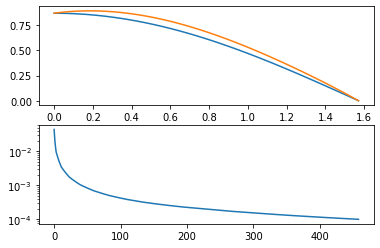

максимальная ошибка = 0.4077636601842473


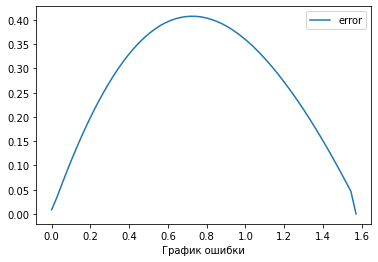

In [7]:
U, err = ellipticEquation((ux0, uxl), (u0y, uly), 1)
showPostProcess(tt, err)
error(U)

Seidel -  429


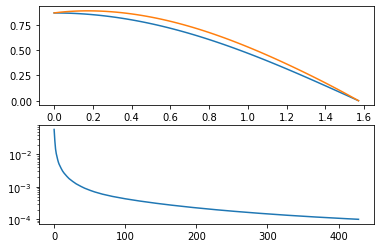

максимальная ошибка = 0.40676390708723587


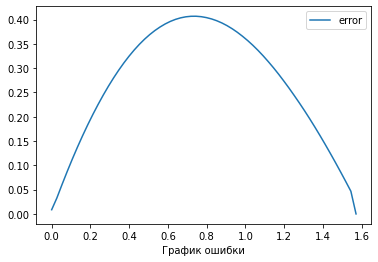

In [8]:
U, err = ellipticEquation((ux0, uxl), (u0y, uly), 2)
showPostProcess(tt, err)
error(U)

upperRelaxation -  353


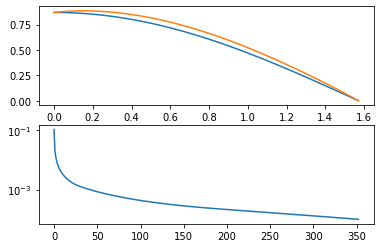

максимальная ошибка = 0.3973857346672874


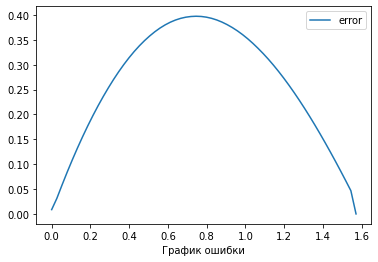

In [9]:
U, err = ellipticEquation((ux0, uxl), (u0y, uly), 3)
showPostProcess(tt, err)
error(U)